<a href="https://colab.research.google.com/github/fernandez-alexis/portfolio/blob/main/WiCDS_Meeting_3_Supervised_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **how to download dataset and upload it:**
1. follow kaggle link (https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis), make an account, and download it
2. unzip file and upload diabetes.csv onto google drive
3. the dataframe should show up when you run the cells

### **Data Info / Cleaning**

We want to get a summary of the essential information in our dataframe, which we can do with the Pandas function 'df.info()'. This summary includes the number of non-null values in each column, the data type of each column, and the count of all entries.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Identifying missing values is the first step in data cleaning. Once you know where the missing values are, you can decide how to handle them. For example, you could remove the rows/columns with too many missing values, or impute the values with appropriate values. We count the missing values with df.isnull().sum(), and in our case there aren't any!

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The following code removes all rows from the dataframe that contain at least one missing value, and counts the remaining missing values in each column afterwards.

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now we want to separate the features (independent variables) and the target variable (dependent variable) in a dataset. X contains all the features that we will ues to predict the target variable, and y contains our target variable 'Outcome'. Separating these will alllow us to train and evaluate machine learning models.

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

The first line in the code below imports the 'train_test_split' function from the sklearn module. It is used to divide your dataset into two parts: one for training the model and one for testing its performance.

X is your feature matrix (independent variables) and y is your target variable (Outcome).

'test_size' specifies the proportion of data that will be reserved for testing. In this case, 30% of the data will be set aside for testing and 70% will be used for training. Random_state ensures that we will have the same split each time.

We want to create four new variables:
- X_train: contains feature data used for training logistic regression model
- X_test: contains feature data used for testing model's performance
- y_train: contains corresponding target variable (labels) for training data
- y_test: contains corresponding target variable (labels) for testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

Text(0.5, 1.0, 'Accuracy: 78.35%')

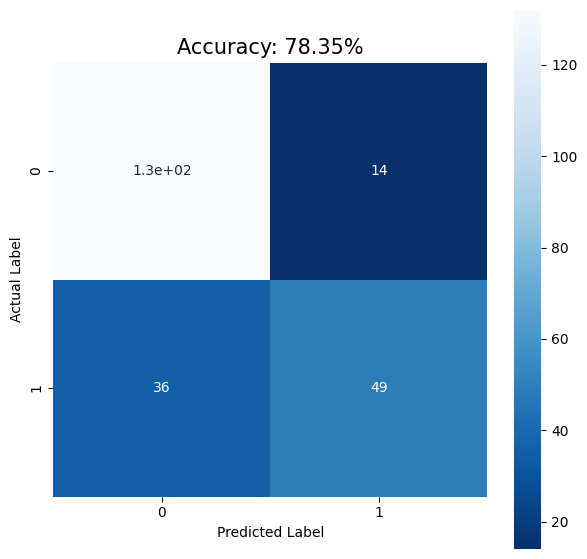

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

score = accuracy_score(y_test, y_pred)
accuracy_percentage = score * 100
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = f"Accuracy: {accuracy_percentage:.2f}%"
plt.title(all_sample_title, size=15)

How can we improve our accuracy score?

### **Decision Trees**

create decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

visualizes decision tree

NameError: ignored

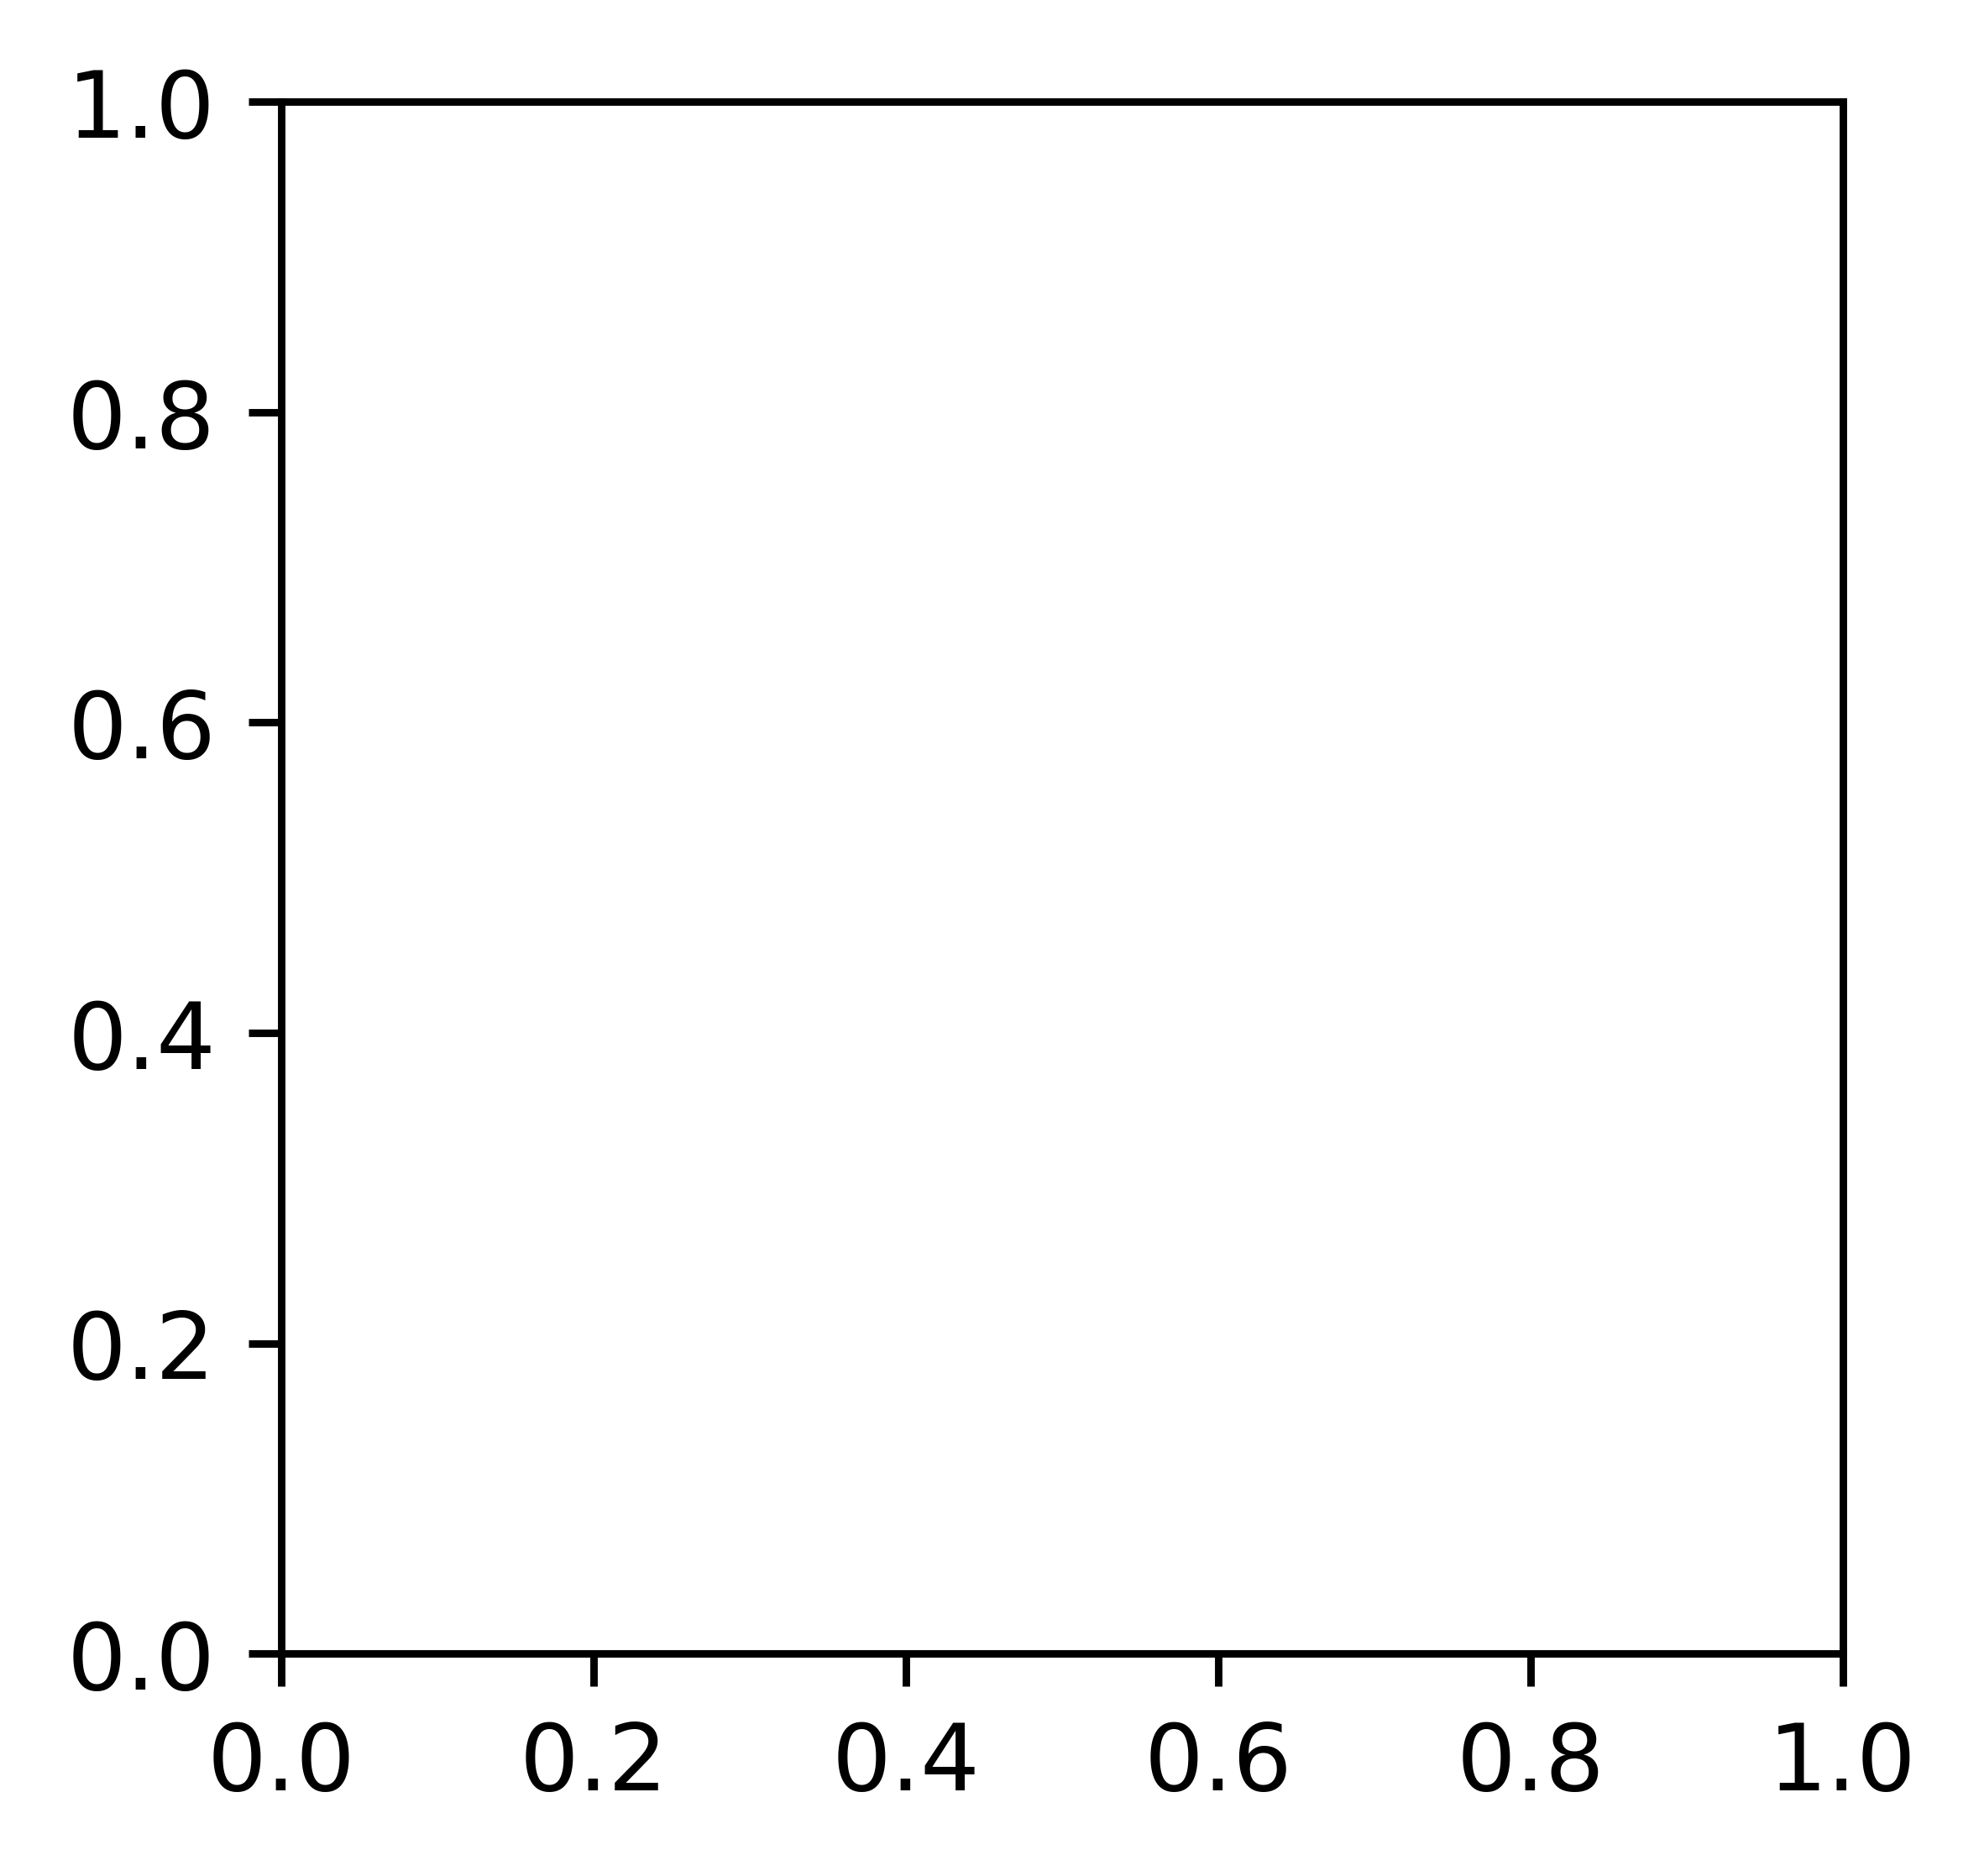

In [ ]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=800)
plot_tree(model, filled = True, feature_names=x.columns, class_names=['0','1']);

## **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

acc = []
roc = []

#create KNN model using sklearn
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

#find accuracy
ac = accuracy_score(y_test,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc = roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))


Accuracy 0.7359307359307359 ROC 0.695245769540693


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#find accuracy
ac = accuracy_score(y_test,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc = roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))


Accuracy 0.7922077922077922 ROC 0.7545124899274779
